In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
data=pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [2]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


# 1.缺失值

## 1.1.原数据

In [3]:
num_col=['cap-diameter','stem-height','stem-width']

对于cap-diameter

In [4]:
data[data['cap-diameter']==0].head(5)[num_col]

,cap-diameter,stem-height,stem-width


对于stem-height

In [5]:
data[data['stem-height']==0].head(5)[num_col]

,cap-diameter,stem-height,stem-width
56480,2.48,0.0,0.0
56481,4.29,0.0,0.0
56482,4.29,0.0,0.0
56483,4.72,0.0,0.0
56484,4.66,0.0,0.0


对于stem-width

In [6]:
data[data['stem-width']==0].head(5)[num_col]

,cap-diameter,stem-height,stem-width
56480,2.48,0.0,0.0
56481,4.29,0.0,0.0
56482,4.29,0.0,0.0
56483,4.72,0.0,0.0
56484,4.66,0.0,0.0


取其中的56480~56482行看看

In [7]:
data.loc[56480:56482,num_col]

,cap-diameter,stem-height,stem-width
56480,2.48,0.0,0.0
56481,4.29,0.0,0.0
56482,4.29,0.0,0.0


注意到`stem-height`和`stem-width`有部分数据为零，这就是数据缺失。因为蘑菇不可能高度/宽度0。

## 1.2.简单删除

In [8]:
data2=data[
    (data['cap-diameter']!=0)&
    (data['stem-height']!=0)&
    (data['stem-width']!=0)]
data2p=data[
    (data['cap-diameter']==0)|
    (data['stem-height']==0)|
    (data['stem-width']==0)]
print('%d - %d = %d'%(data.shape[0],data2p.shape[0],data2.shape[0]))
data2.describe()

61069 - 1059 = 60010


,cap-diameter,stem-height,stem-width
count,60010.000000,60010.000000,60010.000000
mean,6.784995,6.697683,12.363811
std,5.295572,3.283218,9.992346
min,0.380000,0.970000,0.520000
25%,3.510000,4.710000,5.460000
50%,5.955000,6.000000,10.390000
75%,8.600000,7.790000,16.690000
max,62.340000,33.920000,103.910000


筛掉了1059个数据

取其中的56480~56482行看看，发现已被删除

In [9]:
data2.loc[56480:56482,num_col]

,cap-diameter,stem-height,stem-width


## 1.3.均值插补

In [10]:
data3=data.copy()
data3.loc[data3['stem-height']==0,'stem-height']=data3.loc[data3['stem-height']!=0,'stem-height'].mean()
data3.loc[data3['stem-width']==0,'stem-width']=data3.loc[data3['stem-width']!=0,'stem-width'].mean()
data3.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.697683,12.363811
std,5.264845,3.254626,9.905327
min,0.380000,0.970000,0.520000
25%,3.480000,4.740000,5.540000
50%,5.860000,6.040000,10.650000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


取其中的56480~56482行看看

In [11]:
data3.loc[56480:56482,num_col]

,cap-diameter,stem-height,stem-width
56480,2.48,6.697683,12.363811
56481,4.29,6.697683,12.363811
56482,4.29,6.697683,12.363811


## 1.4.同类均值插补

之前没用到的定类变量，此处可以作为分类标准

In [12]:
norm_col=['cap-shape','cap-color','habitat']
data4=data.copy()
gp=data4.groupby(norm_col)
ccc=0
for i in gp.groups:
    print(i)
    ccc+=1
    if ccc>10:
        print('......')
        break

('b', 'e', 'd')
('b', 'e', 'g')
('b', 'e', 'm')
('b', 'g', 'd')
('b', 'g', 'g')
('b', 'k', 'd')
('b', 'k', 'g')
('b', 'k', 'm')
('b', 'l', 'd')
('b', 'l', 'g')
('b', 'l', 'm')
......


In [13]:
gp['stem-height'].agg('mean')

cap-shape  cap-color  habitat
b          e          d          4.538889
                      g          7.059000
                      m          5.713125
           g          d          5.274328
                      g          9.171879
                                   ...   
x          w          l          4.436890
                      m          6.145591
           y          d          6.705722
                      g          6.260000
                      h          4.192757
Name: stem-height, Length: 197, dtype: float64

In [14]:
data4.loc[data4['stem-height']==0,'stem-height']=gp['stem-height'].transform('mean')
data4.loc[data4['stem-width']==0,'stem-width']=gp['stem-width'].transform('mean')
data4.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.617046,12.336212
std,5.264845,3.314251,9.941885
min,0.380000,0.790305,0.520000
25%,3.480000,4.640000,5.410000
50%,5.860000,5.950000,10.370000
75%,8.540000,7.740000,16.600000
max,62.340000,33.920000,103.910000


同样取56480~56482行看看，发现后两列也有所区别，不是简单平均。

In [15]:
data4.loc[56480:56482,num_col]

,cap-diameter,stem-height,stem-width
56480,2.48,3.189854,15.926431
56481,4.29,2.620431,14.175499
56482,4.29,3.189854,15.926431


# 2.异常数据识别

在1.4.同类均值插补的基础上，找出异常数据

看一下概率密度

cap-diameter:


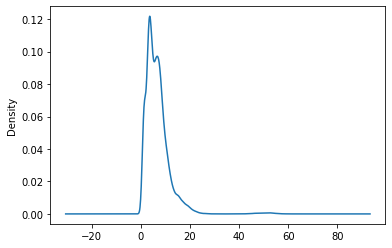

stem-height:


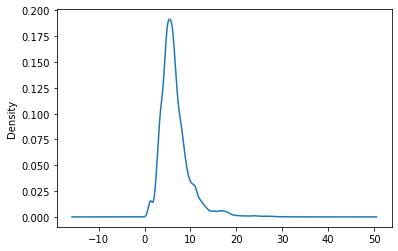

stem-width:


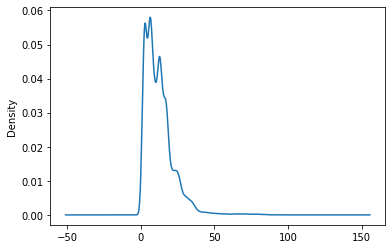

In [16]:
data=data4.copy()
for i in num_col:
    print(i+':')
    data[i].plot(kind="kde")
    plt.show()

## 2.1.箱线图

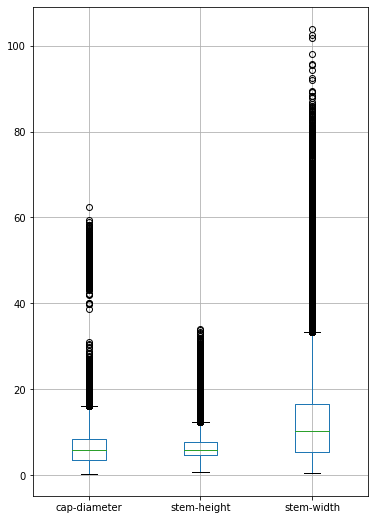

cap-diameter
异常数据： 2400 / 61069 	 占比：3.93%
stem-height
异常数据： 3169 / 61069 	 占比：5.19%
stem-width
异常数据： 2028 / 61069 	 占比：3.32%


In [17]:
box_fig = data.boxplot(num_col,return_type = 'dict',figsize=(6,9))
plt.show()
for i in range(3):
    y = box_fig['fliers'][i].get_ydata()
    print(num_col[i])
    print('异常数据：',len(y),'/',data.shape[0],'\t','占比：%.2f%%'%(len(y)*100/data.shape[0]))

## 2.2.Box-Cox变换

在前面的概率密度函数，和箱线图中，可以看出数据有明显的正偏情况。Box-Cox变换可以使其无偏。

cap-diameter
变换前：


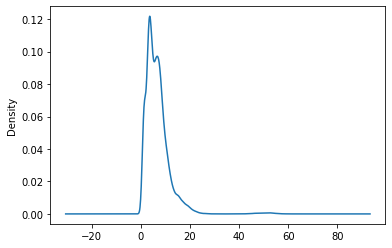

变换后：


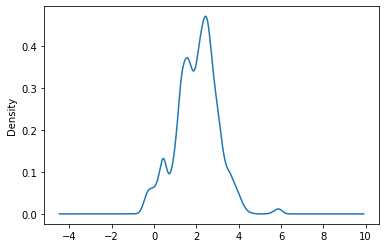


----------------------------------------

stem-height
变换前：


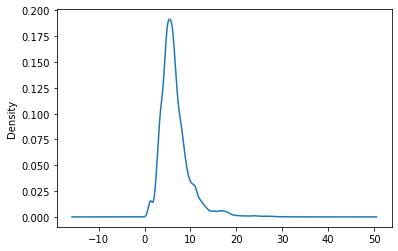

变换后：


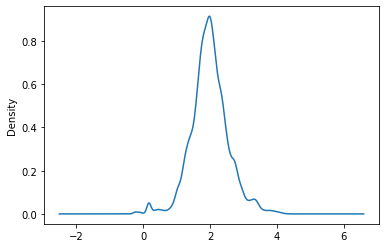


----------------------------------------

stem-width
变换前：


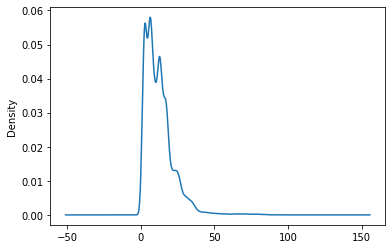

变换后：


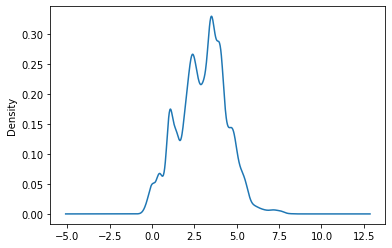


----------------------------------------



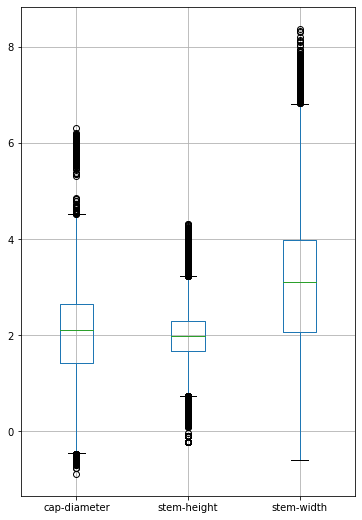

cap-diameter
异常数据： 573 / 61069 	 占比：0.94%
stem-height
异常数据： 2680 / 61069 	 占比：4.39%
stem-width
异常数据： 368 / 61069 	 占比：0.60%


In [18]:
from scipy.stats import boxcox
for i in num_col:
      print(i)
      y=data[i]
      y.plot(kind="kde")
      print('变换前：')
      plt.show()
      y_box,lambda_= boxcox(y)
      y_box=pd.Series(y_box)
      data.loc[:,i]=y_box
      y_box.plot(kind="kde")
      print('变换后：')
      plt.show()
      print('\n'+'-'*40+'\n')
box_fig=data.boxplot(num_col, return_type='dict', figsize=(6, 9))
plt.show()
for i in range(len(num_col)):
      print(num_col[i])
      y=box_fig['fliers'][i].get_ydata()
      print('异常数据：', len(y), '/', data.shape[0], '\t',
            '占比：%.2f%%' % (len(y) * 100 / data.shape[0]))

# 3.异常值处理

In [19]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,2.030543,1.989101,3.000787
std,0.986240,0.562215,1.404922
min,-0.882942,-0.232266,-0.606519
25%,1.409164,1.674315,2.068728
50%,2.105719,1.973709,3.110206
75%,2.654367,2.299553,3.968027
max,6.310364,4.319553,8.373929


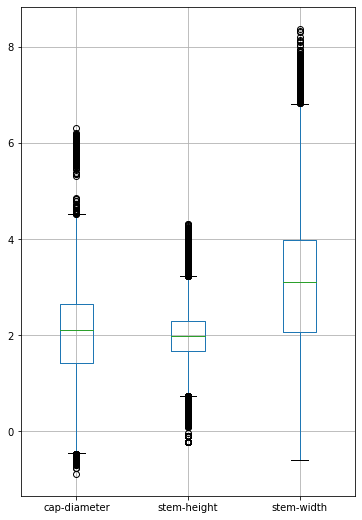

cap-diameter	-0.4586403118966962	4.522171425432546
stem-height	0.7364582396763583	3.237410456760402
stem-width	-0.7802204623115401	6.816975836921284


In [20]:
data.boxplot(return_type='dict', figsize=(6, 9))
plt.show()
L,R={},{}
for i in num_col:
    l,r=data[i].quantile((0.25,0.75))
    m=r-l
    l,r=l-1.5*m,r+1.5*m
    L[i]=l
    R[i]=r
    print(i,l,r,sep='\t')

## 3.1.删除

cap-diameter:


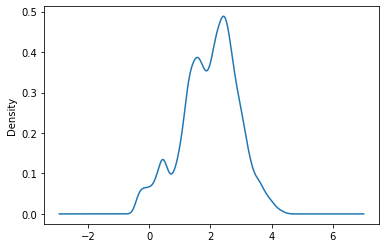

stem-height:


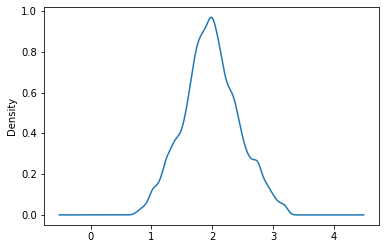

stem-width:


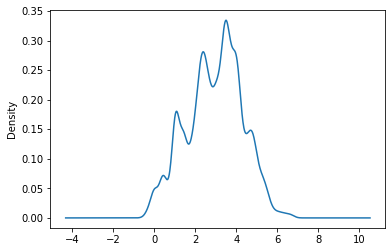

,cap-diameter,stem-height,stem-width
count,57671.000000,57671.000000,57671.000000
mean,1.982404,1.980737,2.950626
std,0.910149,0.456070,1.350061
min,-0.456733,0.736828,-0.606519
25%,1.405508,1.687048,2.065986
50%,2.081581,1.969599,3.066532
75%,2.611437,2.274976,3.911734
max,4.521186,3.236934,6.813792


In [21]:
a,b,c=num_col
data2=data[(data[a]>L[a])&(data[a]<R[a])&
    (data[b]>L[b])&(data[b]<R[b])&
    (data[c]>L[c])&(data[c]<R[c])]
for i in num_col:
    print(i+':')
    data2[i].plot(kind="kde")
    plt.show()
data2.describe()

## 3.2.盖帽

cap-diameter:


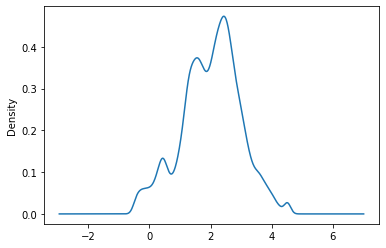

stem-height:


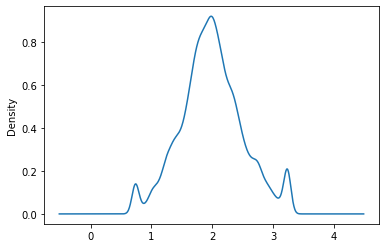

stem-width:


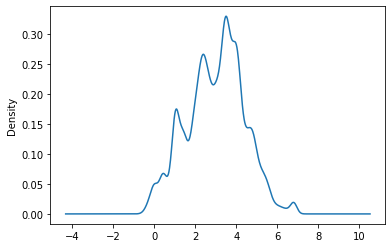

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,2.023116,1.990622,2.997712
std,0.960616,0.518311,1.395775
min,-0.458640,0.736458,-0.606519
25%,1.409164,1.674315,2.068728
50%,2.105719,1.973709,3.110206
75%,2.654367,2.299553,3.968027
max,4.522171,3.237410,6.816976


In [22]:
data3=data.copy()
for i in num_col:
    data3.loc[data3[i]<L[i],i]=L[i]
    data3.loc[data3[i]>R[i],i]=R[i]
for i in num_col:
    print(i+':')
    data3[i].plot(kind="kde")
    plt.show()
data3.describe()